In [1]:
#Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle
import csv
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
import random
import sklearn.metrics as sm
import statistics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


import multiprocessing
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import warnings
warnings.filterwarnings("ignore")
import datetime
starttime = datetime.datetime.now()
import csv
from scipy import stats
import numpy as np
import collections, numpy

In [2]:
#EYES CLOSE DATA
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Feature_array_EC_norm.p", "rb") as fp:   
    Feature_array_EC_norm = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Sub_idx_EC", "rb") as fp:  
    Sub_idx_EC = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/namesec.txt", "rb") as fp:  
    Old_EC = pickle.load(fp)

In [3]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']
TeiQueSF_total = data['TeiQueSF_total']

In [4]:
xCorr= []
for i in Sub_idx_EC:
    hename = Old_EC[int(i)]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    if hename in names:    #If this is in the testNames:
        indices = [i for i, s in enumerate(names) if hename in s] #Get the position of the testNames
        x = (float(TeiQueSF_emotionality[int(indices[0])])) #Get the value of the patient in the test selected
        xCorr.append(x) #Add it in to the xCorr
    else:
        print("No esta"+hename)

In [5]:
newdata = []
for e in Feature_array_EC_norm:
    d = []
    d.append(e[0])
    d.append(e[1])
    newdata.append(d)

In [6]:
X=np.array(newdata)
df=pd.DataFrame(X[:,0])  #Pas to Data frame
df['z_score']=stats.zscore(df) #Get z-score
for r in df['z_score']:        #Per cada linea en z-score
    if -2< r > 2 :  #Si el z-score es major que 2.5
        rows = list(df['z_score'][df['z_score'] == float(r)].index) #Select la posicio que tingui el z-score alt
        text = str(rows) #El guardem en string
        print(text[1:-1])
        del newdata[int(text[1:-1])]
        del xCorr[int(text[1:-1])]

3
12
88
91
98


In [7]:
X=np.array(newdata)
df=pd.DataFrame(X[:,1])  #Pas to Data frame
df['z_score']=stats.zscore(df) #Get z-score
for r in df['z_score']:        #Per cada linea en z-score
    if -2.5< r > 2.5 :  #Si el z-score es major que 2.5
        rows = list(df['z_score'][df['z_score'] == float(r)].index) #Select la posicio que tingui el z-score alt
        text = str(rows) #El guardem en string
        print(text[1:-1])
        del newdata[int(text[1:-1])]
        del xCorr[int(text[1:-1])]

57


LinearRegression

In [8]:
'Not good results'

'Not good results'

Linear SVC

In [9]:
'''Not work'''

'Not work'

XGB CLASSIFIER

In [10]:
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg


**************************************************** 0.1
     --
Counter({0: 69, 1: 52})
     Pred:  [0 0 1 0 0 1 1 1 0 0 0 0 0 1]
     Data:  [0 1 1 0 1 0 0 0 0 1 0 0 0 1]
     ACC 0.5714285714285714
     F1 0.4000000000000001
     Recal 0.4
     Precision 0.4
     --
Counter({0: 70, 1: 51})
     Bad accu
     --
Counter({0: 69, 1: 52})
     Pred:  [1 0 0 0 1 0 0 1 0 0 1 0 0 0]
     Data:  [1 0 1 1 1 0 1 0 0 0 0 0 0 0]
     ACC 0.6428571428571429
     F1 0.4444444444444445
     Recal 0.4
     Precision 0.5
     --
Counter({0: 67, 1: 54})
     Bad accu
     --
Counter({0: 70, 1: 51})
     Bad accu
     --
Counter({0: 71, 1: 50})
     Bad accu
     --
Counter({0: 66, 1: 55})
     Bad accu
     --
Counter({0: 67, 1: 54})
     Pred:  [0 0 0 0 0 0 1 0 1 0 0 0 0 1]
     Data:  [0 0 1 0 0 0 0 0 1 0 0 0 0 1]
     ACC 0.8571428571428571
     F1 0.6666666666666666
     Recal 0.6666666666666666
     Precision 0.6666666666666666
     --
Counter({0: 67, 1: 54})
     Pred:  [1 1 0 0 0 0 0 0 0 1 0 1

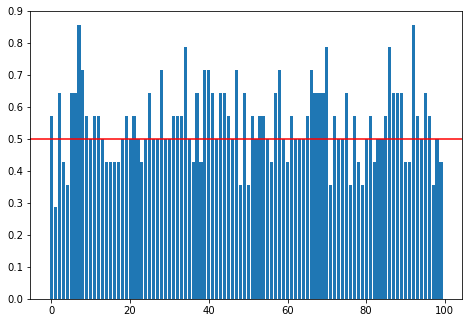

0.5485714285714287
Num de acc que pasa de 0.5:  55
**************************************************** 0.2
     --
Counter({0: 63, 1: 45})
     Pred:  [0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0]
     Data:  [1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1]
     ACC 0.48148148148148145
     F1 0.4166666666666667
     Recal 0.4166666666666667
     Precision 0.4166666666666667
     --
Counter({0: 63, 1: 45})
     Bad accu
     --
Counter({0: 60, 1: 48})
     Pred:  [0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0]
     Data:  [1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0]
     ACC 0.6666666666666666
     F1 0.47058823529411764
     Recal 0.4444444444444444
     Precision 0.5
     --
Counter({0: 63, 1: 45})
     Pred:  [1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0]
     Data:  [1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0]
     ACC 0.7777777777777778
     F1 0.7272727272727272
     Recal 0.6666666666666666
     Precision 0.8
     --
Count

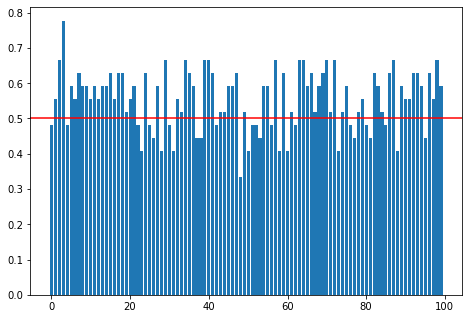

0.5548148148148144
Num de acc que pasa de 0.5:  55
**************************************************** 0.3
     --
Counter({0: 52, 1: 42})
     Pred:  [1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 1 1]
     Data:  [1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0]
     ACC 0.6097560975609756
     F1 0.5294117647058824
     Recal 0.6
     Precision 0.47368421052631576
     --
Counter({0: 53, 1: 41})
     Pred:  [0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 1 0]
     Data:  [0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0
 0 1 1 1]
     ACC 0.5365853658536586
     F1 0.42424242424242425
     Recal 0.4375
     Precision 0.4117647058823529
     --
Counter({0: 53, 1: 41})
     Pred:  [1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0
 0 0 1 0]
     Data:  [1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 0 0 0]
 

In [11]:
xin = list(range(100))
th=5
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    for t in range(0,100):
        print("     --")
        c = list(zip(newdata, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th:# and r<35:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)

        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)

            xgb_model = xgb.XGBClassifier(max_depth=6,learning_rate=0.1,n_estimators=50,
                                            objective='binary:logistic',booster='gbtree',n_jobs=20,
                                            subsample=0.9, colsample_bytree=0.9, colsample_bylevel=0.9,
                                            reg_alpha=0.5, reg_lambda=1.0,gamma=0,
                                            scale_pos_weight=1)
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            if float(recall_score(y_true=testY,y_pred=predY))>=0.40:
                print('     Pred: ', predY)
                print('     Data: ', testY)
                print("     ACC",accuracy_score(y_true=testY, y_pred=predY))
                print("     F1",f1_score(y_true=testY, y_pred=predY))
                print("     Recal",recall_score(y_true=testY,y_pred=predY))
                print("     Precision",precision_score(y_true=testY, y_pred=predY))
                numpase=numpase+1
                accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))            
            else:
                accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))
                print('     Bad accu')
        else:
            accur.append(0)
            print('     Bad division')
    if numpase>=44:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        plt.axhline(y=0.5, color='r', linestyle='-')
        ax.bar(xin,accur)
        plt.show()
        print(cal_average(accur))
    else:
        print('************************************************ The half of the iterations dont past the .6 accur')
    print('Num de acc que pasa de 0.5: ',numpase)


Analisys data by VISUALIZATION

In [12]:
newdata2 = []
for e in range(0,len(Feature_array_EC_norm)):
    d = []
    d.append(Feature_array_EC_norm[e,0])
    d.append(Feature_array_EC_norm[e,2])
    newdata2.append(d)
newdata2 = np.array(newdata2)

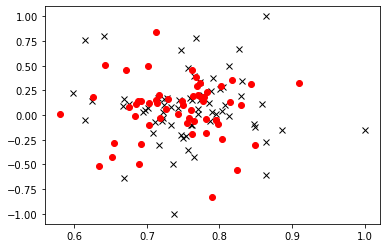

In [13]:
p3 = []
p2=[]
p4=[]
p1=[]
p8 = []
p7=[]
p6=[]
p5=[]
r=0
for i  in range(0,len(xCorr)):
    if xCorr[i]>5:# and r<20:
        p1.append(xCorr[i])
        p2.append(newdata2[i,1])
        r=r+1
    if xCorr[i]<5:
        p3.append(xCorr[i])
        p4.append(newdata2[i,1])
    if xCorr[i]>5:# and r<20:
        p5.append(xCorr[i])
        p6.append(newdata2[i,0])
        r=r+1
    if xCorr[i]<5:
        p7.append(xCorr[i])
        p8.append(newdata2[i,0])
plt.plot(p2, p6, 'x', color='black') 
plt.plot(p4, p8, 'o', color='red') 
plt.show()

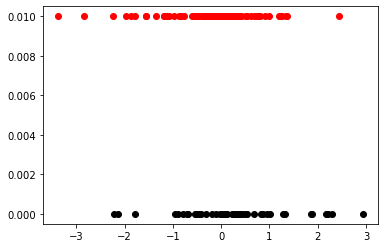

In [14]:
p3 = []
p2=[]
p4=[]
p1=[]
p8 = []
p7=[]
p6=[]
p5=[]
r=0
more4 = []
less4 = []
X_train1 = (newdata2[:,0] - np.mean(newdata2[:,0])) / np.std(newdata2[:,0])
for i  in range(0,len(xCorr)):
    if xCorr[i]>=5.5:# and r<30:
        more4.append(X_train1[i])
        plt.plot(X_train1[i], 0, 'o', color='black') 
        r=r+1
    if xCorr[i]<5.5:
        less4.append(X_train1[i])
        plt.plot(X_train1[i], 0.01, 'o', color='red') 
plt.show()

In [15]:
np.median(more4)

0.24050946845735077

In [16]:
np.median(less4)


-0.012252070655773835